# Binary Classification with logistic regression

For classification problems, we have data ($\mathbf{x}_i$, $y_i$) for i = 1, 2, ..., N, where $\mathbf{x}_i\in\mathbb{R}^p$ is the input/feature and $y_i$ is the output/label, which indicates the class of the input.

In binary classification, the data is divided into class 1 and class 2:

- y = 1 means the input belongs to class 1.

- y = 0 means the input does not belong to class 1, i.e., it belongs to class 2.

## Model
We assume that the probability of the input $\mathbf{x}$ belonging to class 1 is

$$f(\mathbf{x}) = \sigma(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p),$$

where $\sigma$ is the sigmoid function, $\beta_0, \beta_1, \beta_2, ..., \beta_p$ are the parameters of the model, and $x_1, x_2, ..., x_p$ are the features of the input.

The sigmoid function is defined as:
$$\sigma(z) = \frac{1}{1 + e^{-z}}$$
which maps any real number to the range (0, 1).


Using vector notation, we can write the model as:

$$f(x) = \sigma(\mathbf{\beta}^T \mathbf{x})$$

where $\mathbf{\beta} = [\beta_0, \beta_1, \beta_2, ..., \beta_p]$ and $\mathbf{x} = [1, x_1, x_2, ..., x_p]$.


We can interpret the output of the model as the probability of the input belonging to class 1. If the output is greater than 0.5, we predict class 1, otherwise we predict class 0.


Text(0, 0.5, 'y')

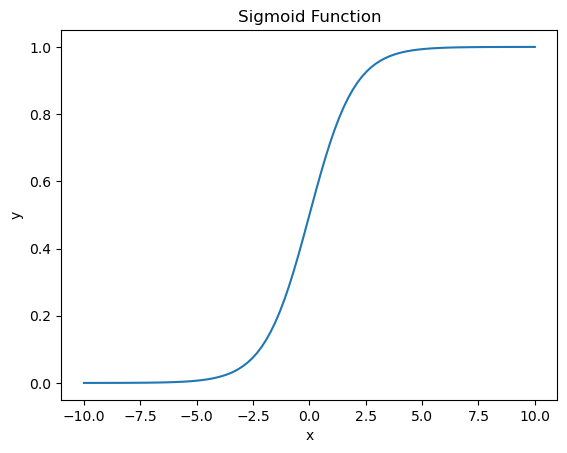

In [1]:
# visualizing the sigmoid function
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('y')

## Binary Cross-Entropy Loss

For binary classification, we will use the binary cross-entropy.

Let $\hat{y} = f(x)$ be the predicted probability that the input $\mathbf{x}$ belonging to class 1.

$$BCE(y, \hat{y}) = -y \log(\hat{y}) - (1 - y) \log(1 - \hat{y})$$

where $y$ is the true label, which is either 0 or 1,
and $\hat{y}$ is the predicted probability, which is in the range (0, 1).

Alternatively, we can write the loss function as:

$$ BCE(y, \hat{y}) = 
\begin{cases}
-\log(\hat{y}) & \text{if } y = 1 \\
-\log(1 - \hat{y}) & \text{if } y = 0
\end{cases}$$

Let's visualize the loss function for $y = 1$ and $y = 0$, and compare the cross-entropy loss function with the mean squared error loss function.

$$ MSE(y, \hat{y}) = (y - \hat{y})^2 $$


Text(0, 0.5, 'Loss')

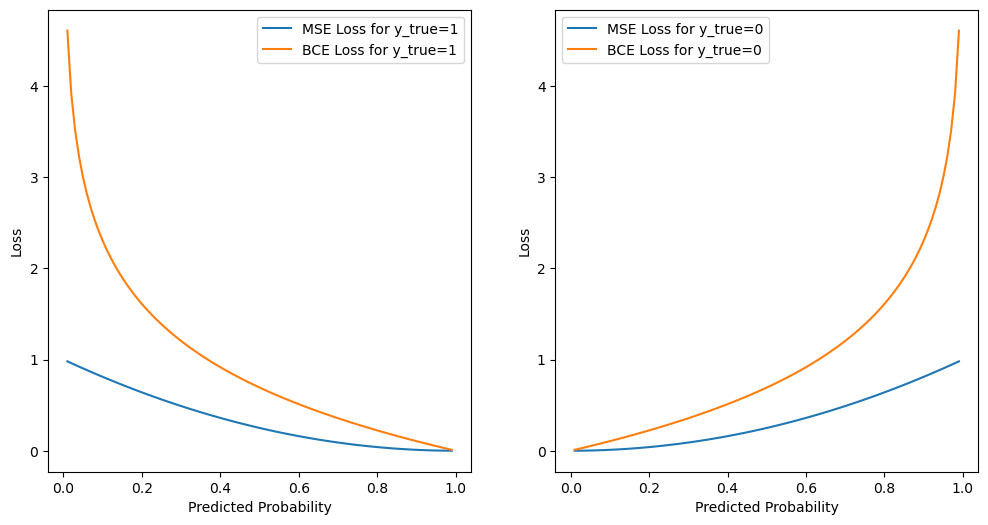

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Predicted probabilities from 0 to 1
p = np.linspace(0.01, 0.99, 100)  # Avoiding the exact 0 and 1 to prevent log(0)

# Calculating Mean Squared Error (MSE) Loss
mse_loss = lambda p, y_true: (p - y_true) ** 2

# Calculating Cross-Entropy (Logistic) Loss
cross_entropy_loss = lambda p, y_true: -y_true * np.log(p) - (1 - y_true) * np.log(1 - p)

# Plotting the losses for y_true = 1 and y_true = 0
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(p, mse_loss(p, 1), label='MSE Loss for y_true=1')
ax[0].plot(p, cross_entropy_loss(p, 1), label='BCE Loss for y_true=1')
ax[0].legend()
ax[0].set_xlabel('Predicted Probability')
ax[0].set_ylabel('Loss')

ax[1].plot(p, mse_loss(p, 0), label='MSE Loss for y_true=0')
ax[1].plot(p, cross_entropy_loss(p, 0), label='BCE Loss for y_true=0')
ax[1].legend()
ax[1].set_xlabel('Predicted Probability')
ax[1].set_ylabel('Loss')




We can see that the cross-entropy loss function penalizes the model more when the predicted probability is far from the true label. 
For example, if the true label is 1 and the model predicts 0.01 probability of class 1, the cross-entropy loss is 4.6, but the mean squared error loss is 0.99.

## Optimization

Our loss function is

$$
\begin{align*}
L(\mathbf{\beta}) &= \sum_{i=1}^{n} BCE(y_i, f(\mathbf{x}_i)) \\
& = \sum_{i=1}^{n} - y_i \log(f(\mathbf{x}_i)) - (1 - y_i) \log(1 - f(\mathbf{x}_i)) \\
& = \sum_{i=1}^{n} y_i \log(1+e^{-\mathbf{\beta}^T \mathbf{x}_i})   - (1 - y_i)   (-\mathbf{\beta}^T \mathbf{x}_i - \log(1+e^{-\mathbf{\beta}^T \mathbf{x}_i}))\\
& = \sum_{i=1}^{n}  \log(1+e^{-\mathbf{\beta}^T \mathbf{x}_i}) +(1-y_i) \mathbf{\beta}^T \mathbf{x}_i
\end{align*}$$


We arrive at the following minimization problem:

$$\min_{\mathbf{\beta}} L(\mathbf{\beta})$$

There is no closed-form solution for the minimization problem, so we need to use optimization algorithms to find the optimal parameters $\mathbf{\beta}$.



## Prediction and Performance Metrics

After we find the optimal parameters $\mathbf{\beta}$, we can use the model to make predictions. The output of the model is the probability of the input belonging to class 1. Therefore, if the output is greater than 0.5, we predict class 1, otherwise we predict class 0.

Accuracy is the most common metric for classification problems. It is defined as the number of correct predictions divided by the total number of predictions.

Alternatively, we can use the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) to evaluate the performance of the model. The confusion matrix is a table that shows the number of true positives, true negatives, false positives, and false negatives.

## Visualizing the logistic regression model in 1D

Why not use a linear regression model for binary classification? Let's see an example in 1D.


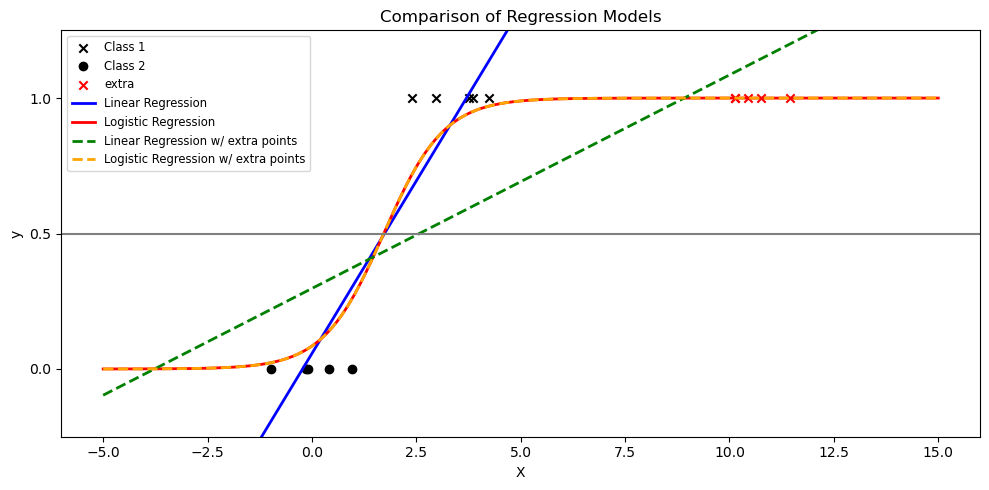

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Set seed for reproducibility
np.random.seed(0)

# Generate a toy dataset
N = 5
x_class1 = np.random.normal(2, 1, N)
x_class2 = np.random.normal(0, 1, N)

y_class1 = np.ones(N)
y_class2 = np.zeros(N)

# Include outlier
n = 5
x_extra = np.array([10]) + np.random.normal(0, 1, n)
y_extra = np.ones(n)


# Features and labels, with and without outlier
X = np.concatenate((x_class1, x_class2)).reshape(-1, 1)
y = np.concatenate((y_class1, y_class2))

X_with_extra = np.vstack([X, x_extra.reshape(-1, 1)])
y_with_extra = np.concatenate([y, y_extra])

# Fit linear regression
ols = LinearRegression()
ols.fit(X, y)
ols_with_extra = LinearRegression()
ols_with_extra.fit(X_with_extra, y_with_extra)

# Fit logistic regression
clf = LogisticRegression()
clf.fit(X, y)
clf_with_extra = LogisticRegression()
clf_with_extra.fit(X_with_extra, y_with_extra)

# Generate test data for plotting
X_test = np.linspace(-5, 15, 300).reshape(-1, 1)
y_test = ols.predict(X_test)
y_test_with_extra = ols_with_extra.predict(X_test)
logistic_prob = sigmoid(clf.coef_ * X_test + clf.intercept_)
logistic_prob_with_extra = sigmoid(clf_with_extra.coef_ * X_test + clf_with_extra.intercept_)

# Plotting
plt.figure(figsize=(10, 5))

# plot data
plt.scatter(x_class1, y_class1, label='Class 1', marker='x', color='k')
plt.scatter(x_class2, y_class2, label='Class 2', marker='o', color='k')
plt.scatter(x_extra, y_extra, color='red', label="extra", marker='x')

# Without extra points
plt.plot(X_test, y_test, label="Linear Regression", linewidth=2, color='blue')
plt.plot(X_test, logistic_prob, label="Logistic Regression", linewidth=2, color='red')

# With extra points
# plt.scatter(X_with_extra, y_with_extra, label="Data w/ Outlier", color="black", alpha=0.5, zorder=20)
plt.plot(X_test, y_test_with_extra, label="Linear Regression w/ extra points", linestyle='--', linewidth=2, color='green')
plt.plot(X_test, logistic_prob_with_extra, label="Logistic Regression w/ extra points", linestyle='--', linewidth=2, color='orange')

plt.title("Comparison of Regression Models")
plt.axhline(0.5, color=".5")
plt.ylabel("y")
plt.xlabel("X")
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.legend(loc="upper left", fontsize="small")
plt.tight_layout()
plt.show()


## Visualizing logistic regression in 2D

The key is that the logistic regression model seeks a linear decision boundary that separates the two classes: a straight line in 2D, a plane in 3D, etc. That is, the decision boundary is "flat" and not "curved".

Text(0, 0.5, 'Feature 2')

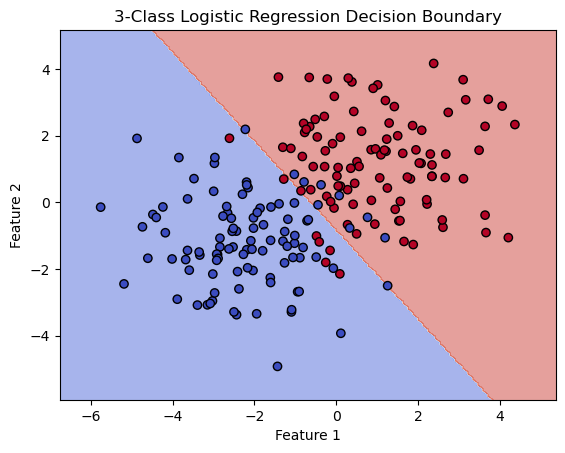

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

# Set random seed for reproducibility
np.random.seed(0)

# Number of samples per class
N = 100

# Generate data: class 1 centered at (2, 2), class 2 centered at (-2, -2)
x_class1 = np.random.multivariate_normal([1, 1], 2*np.eye(2), N)
x_class2 = np.random.multivariate_normal([-2, -1], 2*np.eye(2), N)

# Combine into a single dataset
X = np.vstack((x_class1, x_class2))
y = np.concatenate((np.ones(N), np.zeros(N)))

# Create a logistic regression classifier
clf = LogisticRegression()
clf.fit(X, y)

# Plot the decision boundaries using DecisionBoundaryDisplay
fig, ax = plt.subplots()
db_display = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    grid_resolution=200,
    response_method="predict",  # Can be "predict_proba" for probability contours
    cmap='coolwarm',
    alpha=0.5,
    ax=ax
)
# Scatter plot of the data points
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')

# Adding title and labels
ax.set_title('3-Class Logistic Regression Decision Boundary')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')



## Binary Classification using penguins dataset

In this part, we will use 2 features to predict the sex of the penguins and visualize the decision boundary.

In [5]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Load the dataset
df = sns.load_dataset('penguins')

# Drop rows with missing values
df.dropna(subset=['sex', 'bill_length_mm', 'bill_depth_mm'], inplace=True)

# Use features to predict sex
features = ['bill_length_mm', 'bill_depth_mm']

# Select features
X = df[features]
y = df['sex']

# Initialize and train the logistic regression model
clf = LogisticRegression(penalty=None)
clf.fit(X, y)

# Calculate the training and test accuracy
score = clf.score(X, y)
print(f"Training accuracy: {score:.2f}")



Training accuracy: 0.78


We can visualize the decision boundary using `DecisionBoundaryDisplay` from `sklearn`.

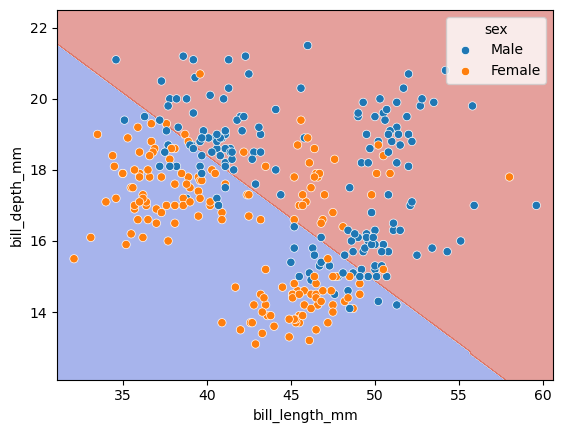

In [6]:
import seaborn as sns
# Plot the decision boundaries using DecisionBoundaryDisplay
fig, ax = plt.subplots()
db_display = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    grid_resolution=200,
    response_method="predict",  # Can be "predict_proba" for probability contours
    cmap='coolwarm',
    alpha=0.5,
    ax=ax
)
# Scatter plot of the data points
scatter = sns.scatterplot(data=df, x=df[features[0]], y=df[features[1]], hue='sex')

We can also use the confusion matrix to have a more detailed view of the model's performance.

Confusion Matrix:
 [[130  35]
 [ 37 131]]


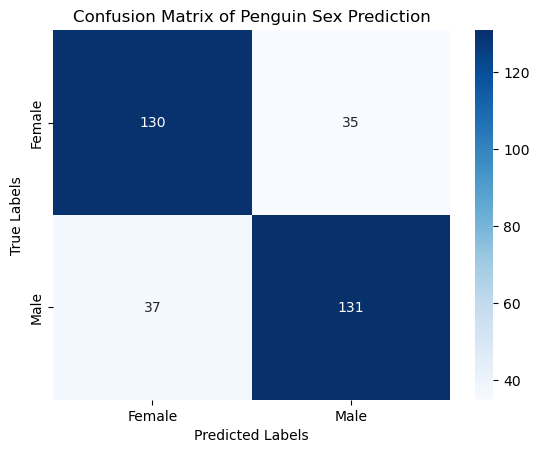

In [7]:
# Predict on the test set
y_pred = clf.predict(X)

# Evaluate the model
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plotting the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Penguin Sex Prediction')
plt.show()
